This file adds real empty trenches to the Omnipose training set

In [1]:
from PIL import Image
import numpy as np
import skimage
import zarr
import matplotlib.pyplot as plt
import os


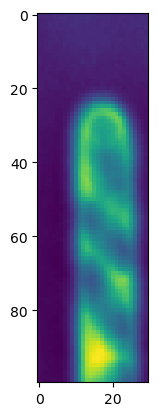

In [6]:
image_path = r'D:\PRISM\trenches_0000growth.zarr'
z1 = zarr.open(image_path, 'r')
real_empty_trench = z1[2, 0, 0, :, :]
# 734, 737, 740
plt.imshow(real_empty_trench)

In [10]:
import napari

# Assuming z1 is your Zarr dataset
viewer = napari.Viewer()

# Add the Zarr data to the viewer
viewer.add_image(z1, name='Trench Data')

# Start the napari viewer
napari.run()


In [3]:
import os

# Set the correct base directory
SyMBac_dir = "D:/PRISM/Omnipose_train/SyMBacData/100x_pc_20250510/"
conv_dir = os.path.join(SyMBac_dir, "convolutions")
mask_dir = os.path.join(SyMBac_dir, "masks")

# Check if the directories exist
if not os.path.exists(conv_dir):
    print(f"The directory {conv_dir} does not exist.")
else:
    # Count files in the convolutions directory
    count = len([entry for entry in os.listdir(conv_dir) if os.path.isfile(os.path.join(conv_dir, entry))])
    print(f"Number of files: {count}")


Number of files: 2555


In [12]:
print([entry for entry in os.listdir(conv_dir) if os.path.isfile(os.path.join(conv_dir, entry))][0])
print([entry for entry in os.listdir(mask_dir) if os.path.isfile(os.path.join(mask_dir, entry))][0])
print("Nonesynth_{}.png".format(str(count+1).zfill(5)))

1011synth_00000.png
1011synth_00000.png
Nonesynth_01651.png


In [178]:
for i in range(count, count+13):
    real_empty_trench = np.array(real_empty_trench)
    mask = np.zeros(real_empty_trench.shape)
    syn_image = Image.fromarray(skimage.img_as_uint(real_empty_trench))
    syn_image.save(SyMBac_dir + "convolutions/Nonesynth_{}.png".format(str(i).zfill(5)))
    mask = Image.fromarray(mask.astype(np.uint8))
    mask.save(SyMBac_dir + "masks/Nonesynth_{}.png".format(str(i).zfill(5)))

In [7]:
import numpy as np
import zarr
import os
from PIL import Image
from skimage import img_as_uint

# === Paths ===
image_path = r'D:\PRISM\trenches_0111_empty.zarr'
z1 = zarr.open(image_path, 'r')

save_dir = r"D:\PRISM\Omnipose_train\SyMBacData\100x_pc_20250510"
conv_dir = os.path.join(save_dir, "convolutions")
mask_dir = os.path.join(save_dir, "masks")
os.makedirs(conv_dir, exist_ok=True)
os.makedirs(mask_dir, exist_ok=True)

# === Known trenches that contain cells (0-based index) ===
cell_indices = [4, 27, 69, 77, 87, 136, 154, 166, 167]  # ← fill in actual values you want to exclude

# === Determine current file count for filename indexing ===
existing = len([f for f in os.listdir(conv_dir) if f.endswith('.png')])
index = existing

# === Loop through Zarr, skipping trenches with cells ===
for i in range(z1.shape[0]):
    if i in cell_indices:
        continue  # skip trenches with cells
    
    img = z1[i, 0, 0, :, :]
    
    # Save image
    syn_image = Image.fromarray(img_as_uint(img))
    syn_image.save(os.path.join(conv_dir, f"Nonesynth_{str(index).zfill(5)}.png"))
    
    # Save blank mask
    empty_mask = Image.fromarray(np.zeros_like(img, dtype=np.uint8))
    empty_mask.save(os.path.join(mask_dir, f"Nonesynth_{str(index).zfill(5)}.png"))
    
    print(f"Saved trench {i} as Nonesynth_{str(index).zfill(5)}.png")
    index += 1


Saved trench 0 as Nonesynth_02830.png
Saved trench 1 as Nonesynth_02831.png
Saved trench 2 as Nonesynth_02832.png
Saved trench 3 as Nonesynth_02833.png
Saved trench 5 as Nonesynth_02834.png
Saved trench 6 as Nonesynth_02835.png
Saved trench 7 as Nonesynth_02836.png
Saved trench 8 as Nonesynth_02837.png
Saved trench 9 as Nonesynth_02838.png
Saved trench 10 as Nonesynth_02839.png
Saved trench 11 as Nonesynth_02840.png
Saved trench 12 as Nonesynth_02841.png
Saved trench 13 as Nonesynth_02842.png
Saved trench 14 as Nonesynth_02843.png
Saved trench 15 as Nonesynth_02844.png
Saved trench 16 as Nonesynth_02845.png
Saved trench 17 as Nonesynth_02846.png
Saved trench 18 as Nonesynth_02847.png
Saved trench 19 as Nonesynth_02848.png
Saved trench 20 as Nonesynth_02849.png
Saved trench 21 as Nonesynth_02850.png
Saved trench 22 as Nonesynth_02851.png
Saved trench 23 as Nonesynth_02852.png
Saved trench 24 as Nonesynth_02853.png
Saved trench 25 as Nonesynth_02854.png
Saved trench 26 as Nonesynth_02855

In [8]:
import re

def extract_index(filename):
    match = re.search(r"Nonesynth_(\d+)\.png", filename)
    return int(match.group(1)) if match else -1

nonesynth_files = [
    f for f in os.listdir(conv_dir)
    if f.startswith("Nonesynth_") and f.endswith(".png")
]
nonesynth_files.sort(key=extract_index)

print("Most recent Nonesynth image:", nonesynth_files[-1])
print("Next filename should be:", f"Nonesynth_{str(extract_index(nonesynth_files[-1]) + 1).zfill(5)}.png")


Most recent Nonesynth image: Nonesynth_02990.png
Next filename should be: Nonesynth_02991.png


In [13]:
import numpy as np
import zarr
import os
from PIL import Image
from skimage import img_as_uint

# === Paths ===
image_path = r'D:\PRISM\trenches_1001_empty.zarr'
z1 = zarr.open(image_path, 'r')

save_dir = r"D:\PRISM\Omnipose_train\SyMBacData\100x_pc_20250510"
conv_dir = os.path.join(save_dir, "convolutions")
mask_dir = os.path.join(save_dir, "masks")
os.makedirs(conv_dir, exist_ok=True)
os.makedirs(mask_dir, exist_ok=True)

# === Known trenches that contain cells (0-based index) ===
cell_indices = [16, 28, 45, 65, 81, 83, 153, 236, 269]  # ← fill in actual values you want to exclude

# === Determine current file count for filename indexing ===
existing = len([f for f in os.listdir(conv_dir) if f.endswith('.png')])
index = existing

# === Loop through Zarr, skipping trenches with cells ===
for i in range(z1.shape[0]):
    if i in cell_indices:
        continue  # skip trenches with cells
    
    img = z1[i, 0, 0, :, :]
    
    # Save image
    syn_image = Image.fromarray(img_as_uint(img))
    syn_image.save(os.path.join(conv_dir, f"Nonesynth_{str(index).zfill(5)}.png"))
    
    # Save blank mask
    empty_mask = Image.fromarray(np.zeros_like(img, dtype=np.uint8))
    empty_mask.save(os.path.join(mask_dir, f"Nonesynth_{str(index).zfill(5)}.png"))
    
    print(f"Saved trench {i} as Nonesynth_{str(index).zfill(5)}.png")
    index += 1


Saved trench 0 as Nonesynth_03826.png
Saved trench 1 as Nonesynth_03827.png
Saved trench 2 as Nonesynth_03828.png
Saved trench 3 as Nonesynth_03829.png
Saved trench 4 as Nonesynth_03830.png
Saved trench 5 as Nonesynth_03831.png
Saved trench 6 as Nonesynth_03832.png
Saved trench 7 as Nonesynth_03833.png
Saved trench 8 as Nonesynth_03834.png
Saved trench 9 as Nonesynth_03835.png
Saved trench 10 as Nonesynth_03836.png
Saved trench 11 as Nonesynth_03837.png
Saved trench 12 as Nonesynth_03838.png
Saved trench 13 as Nonesynth_03839.png
Saved trench 14 as Nonesynth_03840.png
Saved trench 15 as Nonesynth_03841.png
Saved trench 17 as Nonesynth_03842.png
Saved trench 18 as Nonesynth_03843.png
Saved trench 19 as Nonesynth_03844.png
Saved trench 20 as Nonesynth_03845.png
Saved trench 21 as Nonesynth_03846.png
Saved trench 22 as Nonesynth_03847.png
Saved trench 23 as Nonesynth_03848.png
Saved trench 24 as Nonesynth_03849.png
Saved trench 25 as Nonesynth_03850.png
Saved trench 26 as Nonesynth_03851.

In [12]:
import numpy as np
import zarr
import os
from PIL import Image
from skimage import img_as_uint

# === Paths ===
image_path = r'D:\PRISM\trenches_0110_empty.zarr'
z1 = zarr.open(image_path, 'r')

save_dir = r"D:\PRISM\Omnipose_train\SyMBacData\100x_pc_20250510"
conv_dir = os.path.join(save_dir, "convolutions")
mask_dir = os.path.join(save_dir, "masks")
os.makedirs(conv_dir, exist_ok=True)
os.makedirs(mask_dir, exist_ok=True)

# === Known trenches that contain cells (0-based index) ===
cell_indices = [12, 14, 15, 20, 27, 31, 36, 37, 44, 45, 46, 47, 53, 54, 72, 73, 84, 88, 106, 114, 119, 120, 130, 131, 134, 137, 138, 148, 149, 157, 166, 169, 185, 188, 189, 191, 192, 207, 214, 218, 220, 221, 224, 225, 226, 227, 234, 238, 241, 244, 245, 247, 251, 254, 266, 270, 271, 272, 273, 274]  # ← fill in actual values you want to exclude

# === Determine current file count for filename indexing ===
existing = len([f for f in os.listdir(conv_dir) if f.endswith('.png')])
index = existing

# === Loop through Zarr, skipping trenches with cells ===
for i in range(z1.shape[0]):
    if i in cell_indices:
        continue  # skip trenches with cells
    
    img = z1[i, 0, 0, :, :]
    
    # Save image
    syn_image = Image.fromarray(img_as_uint(img))
    syn_image.save(os.path.join(conv_dir, f"Nonesynth_{str(index).zfill(5)}.png"))
    
    # Save blank mask
    empty_mask = Image.fromarray(np.zeros_like(img, dtype=np.uint8))
    empty_mask.save(os.path.join(mask_dir, f"Nonesynth_{str(index).zfill(5)}.png"))
    
    print(f"Saved trench {i} as Nonesynth_{str(index).zfill(5)}.png")
    index += 1


Saved trench 0 as Nonesynth_03599.png
Saved trench 1 as Nonesynth_03600.png
Saved trench 2 as Nonesynth_03601.png
Saved trench 3 as Nonesynth_03602.png
Saved trench 4 as Nonesynth_03603.png
Saved trench 5 as Nonesynth_03604.png
Saved trench 6 as Nonesynth_03605.png
Saved trench 7 as Nonesynth_03606.png
Saved trench 8 as Nonesynth_03607.png
Saved trench 9 as Nonesynth_03608.png
Saved trench 10 as Nonesynth_03609.png
Saved trench 11 as Nonesynth_03610.png
Saved trench 13 as Nonesynth_03611.png
Saved trench 16 as Nonesynth_03612.png
Saved trench 17 as Nonesynth_03613.png
Saved trench 18 as Nonesynth_03614.png
Saved trench 19 as Nonesynth_03615.png
Saved trench 21 as Nonesynth_03616.png
Saved trench 22 as Nonesynth_03617.png
Saved trench 23 as Nonesynth_03618.png
Saved trench 24 as Nonesynth_03619.png
Saved trench 25 as Nonesynth_03620.png
Saved trench 26 as Nonesynth_03621.png
Saved trench 28 as Nonesynth_03622.png
Saved trench 29 as Nonesynth_03623.png
Saved trench 30 as Nonesynth_03624.